Questions:

How do Strava users differ?

-Average time, age, time in age

How did the most recent shift in BQ times affect marathon times?
-Percentage of each age group 0-5 minutes above, 0-5, 5-10, 10-15 minutes below.

Is this similar to the prior BQ shift?

Same for other courses?
-CIM, Philadelphia, Erie Marathon(just prior to change), Berlin
-Check percentage of international

Control for weather

Plot bins over time. Overall, people younger than 40, people older than 40.

In [1]:
import requests
import dill
from bs4 import BeautifulSoup
from datetime import datetime
from dateutil.parser import parse
import re
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set


<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [2]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
def load_pkl(filename):
    with open('data/'+filename, 'rb') as fobj:
        return dill.load(fobj)

In [102]:
df_2019 = load_pkl('2019_results')
df_2016 = load_pkl('2016_results')
df_2017 = load_pkl('2017_results')
df_2018 = load_pkl('2018_results')
df_strava = load_pkl('2019_results_strava')

In [198]:
for a in range(0,2):
    print(a)

0
1


In [199]:
finishers_dict = {}
for year in range(1996,2020):
    yr_str = str(year)
    finishers_dict[yr_str] = load_pkl(f'{yr_str}_results')

In [115]:
df.Division.unique()

array(['30-34', '25-29', '20-24', '35-39', '40-44', '45-49', '16-19',
       '50-54', '55-59', '60-64', '65-69', '70-74', '–', '75-79', '80+'],
      dtype=object)

In [132]:
print(a)

[2, 3]


In [195]:
a, b = np.histogram(df.Time, bins = np.linspace(2,8,73))

In [196]:
a

array([   0,    8,   20,   20,   35,   57,   67,  117,  205,  276,  423,
        754,  550,  689,  815,  879, 1085, 1360, 1179, 1285, 1438, 1591,
       1729, 1954, 1446, 1425, 1390, 1479, 1453, 1514, 1302, 1343, 1310,
       1319, 1199, 1222,  982,  908,  845,  829,  836,  833,  681,  677,
        657,  617,  567,  551,  477,  368,  418,  379,  331,  296,  236,
        230,  169,  153,  117,   99,   94,   97,   73,   57,   40,   38,
         35,   18,   27,   26,   16,   13], dtype=int64)

In [120]:
count_dict_m = {}
count_dict_w = {}
for div in df.Division.unique():
    temp_df_m = df[df.Division == div & df.Gender == 'M']
    temp_df_w = df[df.Division == div & df.Gender == 'W']
    
    counts, _ = np.histogram(temp_df_m.Time, bins = np.linspace(2,8,73))
    count_dict_m[div] = counts
    counts, _ = np.histogram(temp_df_w.Time, bins = np.linspace(2,8,73))
    count_dict_w[div] = counts

In [129]:
bq_divs = ['16-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

In [128]:
bq_times_men = [3, 3, 3, 3, 37/12, 38/12, 40/12, 41/12, 43/12, 46/12, 49/12, 52/12, 55/12, 58/12]
bq_times_women = [time+0.5 for time in bq_times_men]

In [226]:
bq_m_96 = [190/60, 190/60, 190/60, 190/60, 195/60, 200/60, 205/60, 210/60, 215/60, 220/60, 225/60, 230/60, 230/60, 230/60]
bq_w_96 = [time+0.5 for time in bq_m_96]
bq_m_03 = [190/60, 190/60, 190/60, 190/60, 195/60, 200/60, 210/60, 215/60, 225/60, 240/60, 255/60, 270/60, 285/60, 300/60]
bq_w_03 = [time+0.5 for time in bq_m_03]
bq_m_03 = [190/60, 190/60, 190/60, 190/60, 195/60, 200/60, 210/60, 215/60, 225/60, 240/60, 255/60, 270/60, 285/60, 300/60]
bq_w_03 = [time+0.5 for time in bq_m_03]
bq_m_13 = [time-5/60 for time in bq_m_03]
bq_w_13 = [time+0.5 for time in bq_m_13]
bq_m_20 = [time-5/60 for time in bq_m_13]
bq_w_20 = [time+0.5 for time in bq_m_20]



    

In [237]:
bq_dict={}

bq_df = pd.DataFrame()
bq_df['Division'] = bq_divs
bq_df['M'] = bq_m_96
bq_df['W'] = bq_w_96
for year in range(1996,2001):
    bq_dict[str(year)] = bq_df
    
bq_df = pd.DataFrame()
bq_df['Division'] = bq_divs
bq_df['M'] = bq_m_03
bq_df['W'] = bq_w_03
for year in range(2001,2011):
    bq_dict[str(year)] = bq_df
    
bq_df = pd.DataFrame()
bq_df['Division'] = bq_divs
bq_df['M'] = bq_m_13
bq_df['W'] = bq_w_13
for year in range(2011,2018):
    bq_dict[str(year)] = bq_df
    
bq_df = pd.DataFrame()
bq_df['Division'] = bq_divs
bq_df['M'] = bq_m_20
bq_df['W'] = bq_w_20
for year in range(2018,2020):
    bq_dict[str(year)] = bq_df

In [261]:
bq_dict['2018'].head()

,Division,M,W
0,16-19,3.000000,3.500000
1,20-24,3.000000,3.500000
2,25-29,3.000000,3.500000
3,30-34,3.000000,3.500000
4,35-39,3.083333,3.583333


In [208]:
a,_=np.histogram(df[df['Division']=='20-24']['Time'], bins = np.linspace(3-0.25, 3+0.25, 7))

In [209]:
a


array([ 9, 18, 28, 11, 25, 31], dtype=int64)

In [243]:
#bq times have changed
year_list = []
div_list = []
gender_list = []
tr_list = []
number_list = []
prop_list = []

for year in range(1996,2020):
    df = finishers_dict[str(year)]
    bq_df = bq_dict[str(year)]
    for count, division in enumerate(bq_divs):
        div_num = df[(df['Division']==division)]['Time'].count()
#         total_bin_nums = np.histogram(df['Time'], bins = np.linspace(bq_time-0.25, bq_time+0.25, 7))
        for sex in ['M', 'W']:
            sex_num = df[(df['Gender']==sex) & (df['Division']==division)]['Time'].count()
            bq_time = bq_df[bq_df['Division'] == division][sex].values[0]
            bin_nums,_ = np.histogram(df[df['Division']==division]['Time'], bins = np.linspace(bq_time-0.25, bq_time+0.25, 7))
            for val in bin_nums:
                year_list.append(year)
                div_list.append(division)
                gender_list.append(sex)
                number_list.append(val)
                prop_list.append(val/sex_num)
            tr_list.extend(['10-15_under', '5-10_under', '0-5_under', '0-5_over', '5-10_over', '10-15_over'])
                            
            

C:\Users\night\Anaconda3\envs\TDINotebooks\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\night\Anaconda3\envs\TDINotebooks\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in longlong_scalars


In [244]:
data = {'year':year_list, 'sex':gender_list, 'division':div_list, 'bin':tr_list, 'number':number_list, 'proportion':prop_list}
data_df = pd.DataFrame(data)

with open('total_df','wb') as fobj:
        dill.dump(data_df,fobj)

In [252]:
sub_df = data_df[(data_df.sex=='M') & (data_df.division=='30-34')]
sub_df.head()

,year,sex,division,bin,number,proportion
36,1996,M,30-34,10-15_under,21,0.019981
37,1996,M,30-34,5-10_under,20,0.019029
38,1996,M,30-34,0-5_under,39,0.037108
39,1996,M,30-34,0-5_over,37,0.035205
40,1996,M,30-34,5-10_over,38,0.036156


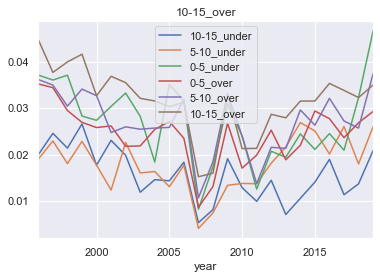

In [257]:
ax = plt.gca()
for time in sub_df.bin.unique():
    sub_df[sub_df.bin==time].plot(kind='line',x='year',y='proportion',ax=ax, title=time)
ax.legend(sub_df.bin.unique())
plt.show()

In [ ]:
pr_score = [
    99.76,
    97.92,
    98.25,
    99.76,
    99.04,
    99.76,
    99.71,
    99.76,
    97.95,
    98.05,
    99.76,
    97.29,
    93.82,
    99.76,
    99.76]

In [265]:
[(1 / finishers_dict[str(year)].Time.mean())/(1/4.5) for year in range(1996,2020)]

[1.0858851956100664,
 1.0786170270467854,
 1.050318961688756,
 1.0567270811763068,
 1.0311901012197984,
 1.0404913104605955,
 1.039120158895964,
 1.0175491735157898,
 1.0116137582066775,
 1.0137093639992243,
 1.0185257683664954,
 0.9202249407583225,
 0.9423056821528664,
 1.0076723034598023,
 0.9508815448666469,
 0.9608333620342895,
 0.9915931735466664,
 0.9911065562185295,
 0.9886374272850929,
 0.9837669211924162,
 0.98260870515841,
 0.9397363719621986,
 0.9854979671025762,
 1.0007679393617064]

In [263]:
finishers_dict['2019'].Time.mean()

4.4965469246248215

In [260]:
[finishers_dict[str(year)].

,sex,division,bin,number,proportion
year,,,,,
1996,168,168,168,168,150
1997,168,168,168,168,156
1998,168,168,168,168,150
1999,168,168,168,168,156
2000,168,168,168,168,168
2001,168,168,168,168,168
2002,168,168,168,168,162
2003,168,168,168,168,156
2004,168,168,168,168,162


In [246]:
len(prop_list)

4032

In [218]:
tr_list[0:10]

['10-15_under',
 '5-10_under',
 '0-5_under',
 '0-5_over',
 '5-10_over',
 '10-15_over',
 '10-15_under',
 '5-10_under',
 '0-5_under',
 '0-5_over']

In [154]:
num_women = [df_2019[(df_2019.Gender == 'W') & (df_2019.Division == div)].Gender.count() for div in bq_divs]
num_men = [df_2019[(df_2019.Gender == 'M') & (df_2019.Division == div)].Gender.count() for div in bq_divs]

In [155]:
num_women

[125, 1309, 3597, 3452, 3579, 3382, 2611, 1747, 938, 369, 126, 34, 5, 0]

In [146]:
ind = 1
div='20-24'

In [162]:
zero_under_women = [df_2019[(df_2019.Gender == 'W') & 
                     (df_2019.Time <= bq_times_women[ind]) & 
                     (df_2019.Time > (bq_times_women[ind]-5)) & 
                     (df_2019.Division == div)].Gender.count() / num_women[ind] \
              for ind, div in enumerate(bq_divs)]

C:\Users\night\Anaconda3\envs\TDINotebooks\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [163]:
five_under_women = [df_2019[(df_2019.Gender == 'W') & 
                     (df_2019.Time <= bq_times_women[ind]-5) & 
                     (df_2019.Time > (bq_times_women[ind]-10)) & 
                     (df_2019.Division == div)].Gender.count() / num_women[ind] \
              for ind, div in enumerate(bq_divs)]

C:\Users\night\Anaconda3\envs\TDINotebooks\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [164]:
ten_under_women = [df_2019[(df_2019.Gender == 'W') & 
                     (df_2019.Time <= bq_times_women[ind]-10) & 
                     (df_2019.Time > (bq_times_women[ind]-15)) & 
                     (df_2019.Division == div)].Gender.count() / num_women[ind] \
              for ind, div in enumerate(bq_divs)]

C:\Users\night\Anaconda3\envs\TDINotebooks\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [165]:
zero_under_men = [df_2019[(df_2019.Gender == 'M') & 
                     (df_2019.Time <= bq_times_men[ind]-5) & 
                     (df_2019.Time > (bq_times_men[ind]-10)) & 
                     (df_2019.Division == div)].Gender.count() / num_men[ind] \
              for ind, div in enumerate(bq_divs)]
five_under_men = [df_2019[(df_2019.Gender == 'M') & 
                     (df_2019.Time <= bq_times_men[ind]-5) & 
                     (df_2019.Time > (bq_times_men[ind]-10)) & 
                     (df_2019.Division == div)].Gender.count() / num_men[ind] \
              for ind, div in enumerate(bq_divs)]
ten_under_men = [df_2019[(df_2019.Gender == 'M') & 
                     (df_2019.Time <= bq_times_men[ind]-10) & 
                     (df_2019.Time > (bq_times_men[ind]-15)) & 
                     (df_2019.Division == div)].Gender.count() / num_men[ind] \
              for ind, div in enumerate(bq_divs)]

In [181]:
gender= 'M'

In [186]:
bq_times = [bq_df[bq_df['Division'] == div][gender].values[0] for div in bq_divs]

In [190]:
bq_times[5]

3.1666666666666665

In [191]:
def finishers_in_window(df_year, gender, upper_lim, lower_lim, div, bq_time):
    return [df_year[(df_year.Gender == gender) & 
                    (df_year.Time <= bq_time-lower_lim) & 
                    (df_year.Time > (bq_time-upper_lim)) & 
                    (df_year.Division == div)].Gender.count()]

In [ ]:
def proportion_vals(df_year, bq_df):
    for sex in ['M', 'W']:
        for div in bq_df['Division']:
            bq_time = bq_df[bq_df['Division']==div][sex]
            finishers_in_window(df_year, sex, )
            

In [157]:
print(zero_under)

0.09243697478991597


In [122]:
count_dict['30-34']

array([  0,   4,   5,   1,  12,  13,  22,  34,  51,  77,  96, 172, 108,
       138, 129, 157, 174, 255, 198, 210, 209, 258, 263, 305, 204, 231,
       213, 257, 192, 222, 207, 219, 203, 179, 166, 183, 146, 140, 110,
       126, 112, 119,  99,  93,  79,  86,  64,  80,  65,  58,  53,  49,
        46,  30,  30,  27,  27,  13,  21,  16,  14,  11,  12,   9,   5,
         4,   5,   0,   7,   0,   2,   3], dtype=int64)

In [4]:
df.head()

,Place,GenderPlace,Name,Country,BibNumber,Division,HalfTime,Time,Gender
0,1,1,"Cherono, Lawrence",KEN,4,30-34,1.037500,2.095833,M
1,3,3,"Mengstu, Asefa",ETH,5,30-34,1.037500,2.096667,M
2,5,5,"Abdi, Bashir",BEL,10,30-34,1.048333,2.103889,M
3,7,7,"Chumba, Dickson",KEN,6,30-34,1.037222,2.153056,M
4,9,9,"Riley, Jacob",USA,16,30-34,1.090000,2.176667,M


In [134]:
df_strava['Time'] = df_strava['Finish (mins)'] / 60

In [22]:
df_strava.head()

,Rank,Gender,Age,Finish,Pace,Finish (mins),Time
0,0,M,45-54,02:04:20,2:57/km,124.333333,2.072222
1,1,M,25-34,02:11:11,3:07/km,131.183333,2.186389
2,2,M,NaN,02:11:39,3:07/km,131.650000,2.194167
3,3,M,25-34,02:14:56,3:12/km,134.933333,2.248889
4,4,M,25-34,02:15:00,3:12/km,135.000000,2.250000


In [56]:
df_plot = df[df['Division']!='–']

In [57]:
divlist = df_plot['Division'].unique()

In [58]:
divlist

array(['30-34', '25-29', '20-24', '35-39', '40-44', '45-49', '16-19',
       '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'],
      dtype=object)

In [68]:
np.histogram(df[df['Division']=='30-34']['Time'], bins = np.linspace(0,8,97))

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,
          5,   1,  12,  13,  22,  34,  51,  77,  96, 172, 108, 138, 129,
        157, 174, 255, 198, 210, 209, 258, 263, 305, 204, 231, 213, 257,
        192, 222, 207, 219, 203, 179, 166, 183, 146, 140, 110, 126, 112,
        119,  99,  93,  79,  86,  64,  80,  65,  58,  53,  49,  46,  30,
         30,  27,  27,  13,  21,  16,  14,  11,  12,   9,   5,   4,   5,
          0,   7,   0,   2,   3], dtype=int64),
 array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
        0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
        0.83333333, 0.91666667, 1.        , 1.08333333, 1.16666667,
        1.25      , 1.33333333, 1.41666667, 1.5       , 1.58333333,
        1.66666667, 1.75      , 1.83333333, 1.91666667, 2.        ,
        2.08333333, 2.16666667, 2.25      , 2.33333333, 2.41666667,
        2.5       , 2.58333333, 2

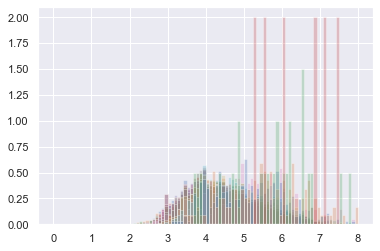

In [62]:
for div in divlist:
    plt.hist(df[df['Division']==div]['Time'], bins = np.linspace(0,8,97), alpha = 0.3, density = True)
plt.show()

    

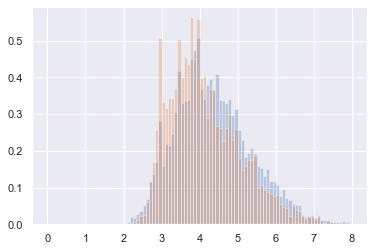

In [66]:
plt.hist(df[(df['Division']=='20-24') | (df['Division']=='25-29') | (df['Division']=='30-34') & (df['Gender']=='M')]['Time'], bins = np.linspace(0,8,97), alpha = 0.3, density = True)
plt.hist(df[(df['Division']=='35-39') & (df['Gender']=='M')]['Time'], bins = np.linspace(0,8,97), alpha = 0.3, density = True)

plt.show()

    

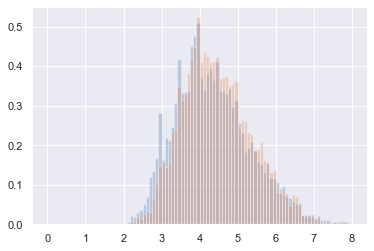

In [95]:
plt.hist(df[(df['Division']=='20-24') | (df['Division']=='25-29') | (df['Division']=='30-34') & (df['Gender']=='M')]['Time'], bins = np.linspace(0,8,97), alpha = 0.3, density = True)

plt.hist(df_2016[(df_2016['Division']=='20-24') | (df_2016['Division']=='25-29') | (df_2016['Division']=='30-34') & (df_2016['Gender']=='M')]['Time'], bins = np.linspace(0,8,97), alpha = 0.3, density = True)

plt.show()

    

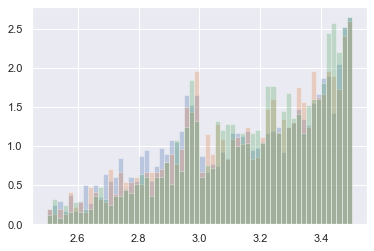

In [98]:
plt.hist(df[(df['Division']=='20-24') | (df['Division']=='25-29') | (df['Division']=='30-34') & (df['Gender']=='M')]['Time'], bins = np.linspace(2.5,3.5,61), alpha = 0.3, density = True)
plt.hist(df_2018[(df_2018['Division']=='20-24') | (df_2018['Division']=='25-29') | (df_2018['Division']=='30-34') & (df_2018['Gender']=='M')]['Time'], bins = np.linspace(2.5,3.5,61), alpha = 0.3, density = True)
plt.hist(df_2017[(df_2017['Division']=='20-24') | (df_2017['Division']=='25-29') | (df_2017['Division']=='30-34') & (df_2017['Gender']=='M')]['Time'], bins = np.linspace(2.5,3.5,61), alpha = 0.3, density = True)

plt.show()

    

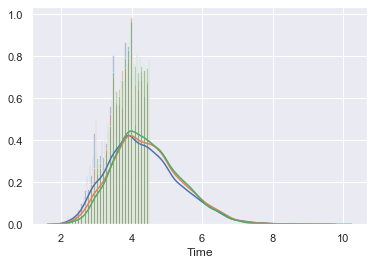

In [101]:
sns.distplot(df[(df['Division']=='20-24') | (df['Division']=='25-29') | (df['Division']=='30-34') & (df['Gender']=='M')]['Time'], bins = np.linspace(2,4.5,61))
sns.distplot(df_2018[(df_2018['Division']=='20-24') | (df_2018['Division']=='25-29') | (df_2018['Division']=='30-34') & (df_2018['Gender']=='M')]['Time'], bins = np.linspace(2,4.5,61))
sns.distplot(df_2016[(df_2016['Division']=='20-24') | (df_2016['Division']=='25-29') | (df_2016['Division']=='30-34') & (df_2016['Gender']=='M')]['Time'], bins = np.linspace(2,4.5,61))

plt.show()

In [38]:
df[df['Division']=='30-34'].head()

,Place,GenderPlace,Name,Country,BibNumber,Division,HalfTime,Time,Gender
0,1,1,"Cherono, Lawrence",KEN,4,30-34,1.037500,2.095833,M
1,3,3,"Mengstu, Asefa",ETH,5,30-34,1.037500,2.096667,M
2,5,5,"Abdi, Bashir",BEL,10,30-34,1.048333,2.103889,M
3,7,7,"Chumba, Dickson",KEN,6,30-34,1.037222,2.153056,M
4,9,9,"Riley, Jacob",USA,16,30-34,1.090000,2.176667,M


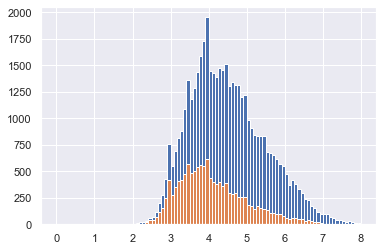

In [135]:
plt.hist(df['Time'], bins = np.linspace(0,8,97))
plt.hist(df_strava['Time'], bins = np.linspace(0,8,97))
plt.show()

In [84]:
df_strava.head()

,Rank,Gender,Age,Finish,Pace,Finish (mins)
0,0,M,45-54,02:04:20,2:57/km,124.333333
1,1,M,25-34,02:11:11,3:07/km,131.183333
2,2,M,NaN,02:11:39,3:07/km,131.650000
3,3,M,25-34,02:14:56,3:12/km,134.933333
4,4,M,25-34,02:15:00,3:12/km,135.000000


In [90]:
sns.distplot?

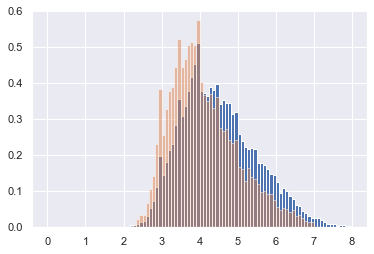

In [137]:
plt.hist(df['Time'], bins = np.linspace(0,8,97), density=True)
plt.hist(df_strava['Time'], bins = np.linspace(0,8,97), density=True, alpha=0.5)
# sns.distplot(df['Time'], bins = np.linspace(0,8,97))
# sns.distplot(df_strava['Time'], bins = np.linspace(0,8,97))
plt.show()